<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Patching IJmuiden
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [17]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt

In [18]:
# Settings
plt.rcParams['axes.grid'] = True

#### Connect database and import data

In [19]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [20]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""tijd"" TIMESTAMP,\n..."
1,table,timeseries,timeseries,3,"CREATE TABLE ""timeseries"" (\n""index"" INTEGER,\..."
2,table,const_mnth,const_mnth,4,"CREATE TABLE ""const_mnth"" (\n""tijd"" TIMESTAMP,..."
3,index,ix_const_yr_tijd_naam_level_2,const_yr,5,"CREATE INDEX ""ix_const_yr_tijd_naam_level_2""ON..."
4,index,ix_timeseries_index,timeseries,6,"CREATE INDEX ""ix_timeseries_index""ON ""timeseri..."
5,index,ix_const_mnth_tijd_naam_level_2,const_mnth,7,"CREATE INDEX ""ix_const_mnth_tijd_naam_level_2""..."


In [21]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT naam, tijd, z0, "
    "M2_ampl as M2, S2_ampl as S2, N2_ampl as N2, "
    "K2_ampl as K2, O1_ampl as O1, K1_ampl as K1 "
    "FROM const_mnth "
    "WHERE (naam IN ('IJmuiden Noordersluis', 'IJmuiden buitenhaven')) "
    "AND z0 < 100 "
    "AND z0 > -100"
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [22]:
df['year'] = df['tijd'].dt.year + (df['tijd'].dt.month - 0.5)/12

In [23]:
#df.set_index(keys = 'year', inplace = True, drop = True)

In [24]:
df

,naam,tijd,z0,M2,S2,N2,K2,O1,K1,year
0,IJmuiden Noordersluis,1883-03-31,-0.559913,37.121192,178.491719,16.847679,157.093411,1.990161,19.123938,1883.208333
1,IJmuiden Noordersluis,1883-04-30,0.742275,63.140369,285.910235,29.223009,250.637296,2.596075,30.651787,1883.291667
2,IJmuiden Noordersluis,1883-05-31,0.058124,69.124540,305.069118,32.149933,268.922112,3.095943,38.241312,1883.375000
3,IJmuiden Noordersluis,1883-06-30,-0.260243,16.865638,101.631199,7.032632,90.968324,1.249140,17.824029,1883.458333
4,IJmuiden Noordersluis,1883-07-31,-0.758988,53.234340,263.956377,22.785662,234.229415,1.910453,23.732891,1883.541667
...,...,...,...,...,...,...,...,...,...,...
1917,IJmuiden buitenhaven,2020-11-30,0.063173,0.642552,0.133701,0.156303,0.262241,0.079634,0.085164,2020.875000
1918,IJmuiden Noordersluis,2020-12-31,0.114366,0.671322,0.153923,0.076994,0.067959,0.129459,0.169528,2020.958333
1919,IJmuiden buitenhaven,2020-12-31,0.064727,0.662873,0.141156,0.077562,0.061875,0.130994,0.162539,2020.958333
1920,IJmuiden Noordersluis,2021-01-31,0.129603,0.680871,0.067418,0.073015,0.082632,0.107565,0.096975,2021.041667


In [25]:
df2 = df.pivot(index = 'year', columns = 'naam', values = 'z0')
df2.dropna(how = 'any', inplace = True)

In [26]:
df2

naam,IJmuiden Noordersluis,IJmuiden buitenhaven
year,,
1981.041667,0.056882,0.017105
1981.125000,-0.101966,-0.146550
1981.208333,0.025028,-0.005727
1981.291667,-0.168538,-0.203802
1981.375000,-0.029040,-0.068996
...,...,...
2020.708333,0.141734,0.085939
2020.791667,0.175867,0.119310
2020.875000,0.114956,0.063173


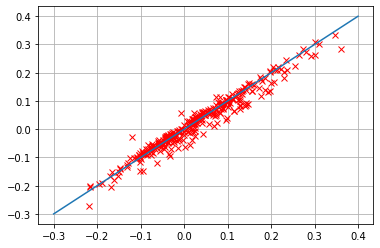

In [27]:
x = np.linspace(-0.3, 0.4, 100)
plt.plot(df2['IJmuiden Noordersluis'], df2['IJmuiden buitenhaven'], 'rx')
plt.plot(x, x);

In [29]:
df2['IJmuiden Noordersluis'].std()

0.10583234547461008

In [30]:
df2['IJmuiden buitenhaven'].std()

0.10198773138976595

#### End script
Prepared by HVEC lab, 2022